### Topic modeling
Extracting topics from the reddit messages 

##### Imports 

In [13]:
# Imports
from bertopic import BERTopic
import pandas as pd
import numpy as np
import nltk 
import matplotlib.pyplot as plt

##### Data 

Loading the data 

In [14]:
# getting subset of data 
messages_df = pd.read_csv("reddit_22_51/messages.csv", sep="\t")
messages_df.head()

,id,user,text
0,j0s252k,HexagonOfVirtue,"im gonna find it just to check, it's not the ..."
1,j0s25h2,Teephex,According to you criticizing and being skeptic...
2,j0s25ht,1platesquat,Gotcha. Can you explain to me why your opinion...
3,j0s25l5,YouLostTheGame,"Euros, which some argue is actually harder tha..."
4,j0s25nr,HMID_Delenda_Est,You've been sounding more like PunishedSubSist...


Info on the data 

In [7]:
# info on data
column_list = messages_df.columns
shape = messages_df.shape

print("columns: ", column_list)
print("shape ", shape)

columns:  Index(['id', 'user', 'text'], dtype='object')
shape  (290898, 3)


Convert data to list of strings (input needed by bertopic)

In [8]:
# convert to list of strings (input needed by bertopic model)
messages_list = messages_df["text"].astype(str).tolist()
len(messages_list)

290898

Get subset of data to work with 

In [6]:
# subset of data - 5000 rows
messages_subset = messages_list[:10000]

##### Bertopic model 

In [7]:
topic_model = BERTopic()
# topic_model = BERTopic.load("MaartenGr/BERTopic_Wikipedia")

In [8]:
# fitting the bertopic model 
topic_model_fitted = topic_model.fit(messages_list)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [9]:
# parameters of the general model
topic_model_fitted.get_params()

{'calculate_probabilities': False,
 'ctfidf_model': ClassTfidfTransformer(),
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f21b506f5e0>,
 'hdbscan_model': HDBSCAN(min_cluster_size=10, prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 10,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'representation_model': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(),
 'verbose': False,
 'zeroshot_min_similarity': 0.7,
 'zeroshot_topic_list': None}

In [15]:
# get info on topics (names, important words, representative reddit message/document)
topic_info = topic_model_fitted.get_topic_info()
topic_info.to_csv("topic_info_full.csv", sep="\t", index=False)

In [11]:
topic_keywords = topic_model.get_topics()

# Print the top words for each topic
for topic, keywords in topic_keywords.items():
    print(f"Topic {topic}: {keywords[:10]}")

Topic -1: [('russia', np.float64(0.0004318975355539528)), ('he', np.float64(0.00042855994642154884)), ('ukraine', np.float64(0.0004177974273248847)), ('and', np.float64(0.00041478254597017097)), ('to', np.float64(0.0004122197792160523)), ('they', np.float64(0.0004102693758906855)), ('in', np.float64(0.00040719580499295083)), ('that', np.float64(0.00040605074415079174)), ('of', np.float64(0.00040537197575087167)), ('the', np.float64(0.00040330089021546253))]
Topic 0: [('abortion', np.float64(0.010336769985987114)), ('abortions', np.float64(0.006728622558765248)), ('fetus', np.float64(0.006082189760774466)), ('pregnancy', np.float64(0.004531975581048736)), ('prolife', np.float64(0.002885691882296214)), ('pregnant', np.float64(0.002875584643609001)), ('baby', np.float64(0.0027841788709396472)), ('unborn', np.float64(0.0025394755336990787)), ('pro', np.float64(0.00245635250776154)), ('mother', np.float64(0.002324061993202084))]
Topic 1: [('healthcare', np.float64(0.013477663497384568)), ('

In [12]:
# get the top words for each topic id (form the topic names)
topic_model_fitted.get_topics()

{-1: [('russia', np.float64(0.0004318975355539528)),
  ('he', np.float64(0.00042855994642154884)),
  ('ukraine', np.float64(0.0004177974273248847)),
  ('and', np.float64(0.00041478254597017097)),
  ('to', np.float64(0.0004122197792160523)),
  ('they', np.float64(0.0004102693758906855)),
  ('in', np.float64(0.00040719580499295083)),
  ('that', np.float64(0.00040605074415079174)),
  ('of', np.float64(0.00040537197575087167)),
  ('the', np.float64(0.00040330089021546253))],
 0: [('abortion', np.float64(0.010336769985987114)),
  ('abortions', np.float64(0.006728622558765248)),
  ('fetus', np.float64(0.006082189760774466)),
  ('pregnancy', np.float64(0.004531975581048736)),
  ('prolife', np.float64(0.002885691882296214)),
  ('pregnant', np.float64(0.002875584643609001)),
  ('baby', np.float64(0.0027841788709396472)),
  ('unborn', np.float64(0.0025394755336990787)),
  ('pro', np.float64(0.00245635250776154)),
  ('mother', np.float64(0.002324061993202084))],
 1: [('healthcare', np.float64(0.0

##### Saving the model 

In [16]:
topic_model_fitted.save("bertopic_model", save_embedding_model=True)

2025-02-10 14:00:31,382 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


##### Testing the saved model 

In [17]:
topic_model = BERTopic.load("bertopic_model")

In [ ]:
# New documents to analyze
new_docs = ["The health care system is flawed and something should be done to improve it",
            "Climate change and global warming are really important issues and are getting worse."]

# Get topics for the new documents
topics, probs = topic_model.transform(new_docs)

[np.int64(-1), np.int64(15)]


In [23]:
# Function to get topic names
def get_topic_name(topic_model, topic_num):
    if topic_num == -1:
        return "Outlier (No strong topic match)"
    topic_words = topic_model.get_topic(topic_num)
    if topic_words:
        return ", ".join([word for word, _ in topic_words])
    return "Unknown Topic"

# Print topic assignments with topic names
for doc, topic_num in zip(new_docs, topics):
    topic_name = get_topic_name(topic_model, topic_num)
    print(f"Document: {doc}\nAssigned Topic: {topic_num} - {topic_name}\n")


Document: The health care system is flawed and something should be done to improve it
Assigned Topic: 1 - healthcare, insurance, medicare, universal, health, medicaid, coverage, aca, obamacare, costs

Document: Climate change and global warming are really important issues and are getting worse.
Assigned Topic: 6 - climate, co2, warming, carbon, temperature, emissions, atmosphere, global, greenhouse, ice



#### Saving the model using safetensors 

In [18]:
topic_model.save("models/bert_topic_model", serialization="safetensors", save_ctfidf=True, save_embedding_model=True)

In [ ]:
loaded_model = BERTopic.load("models/bert_topic_model")

array([1, 6])

In [24]:
# New documents to analyze
new_docs = ["The health care system is flawed and something should be done to improve it",
            "Climate change and global warming are really important issues and are getting worse."]

# Get topics for the new documents
topics, probs = loaded_model.transform(new_docs)

# Print topic assignments with topic names
for doc, topic_num in zip(new_docs, topics):
    topic_name = get_topic_name(loaded_model, topic_num)
    print(f"Document: {doc}\nAssigned Topic: {topic_num} - {topic_name}\n")

Document: The health care system is flawed and something should be done to improve it
Assigned Topic: 1 - healthcare, insurance, medicare, universal, health, medicaid, coverage, aca, obamacare, costs

Document: Climate change and global warming are really important issues and are getting worse.
Assigned Topic: 6 - climate, co2, warming, carbon, temperature, emissions, atmosphere, global, greenhouse, ice



##### Selecting topics

In [13]:
topic_info = pd.read_csv("topic_modelling/outputs/topic_info_full.csv", sep='\t')
topic_info_filtered = topic_info[topic_info['Topic'] != -1]
topic_info_filtered_first_100 = topic_info_filtered.head(100)

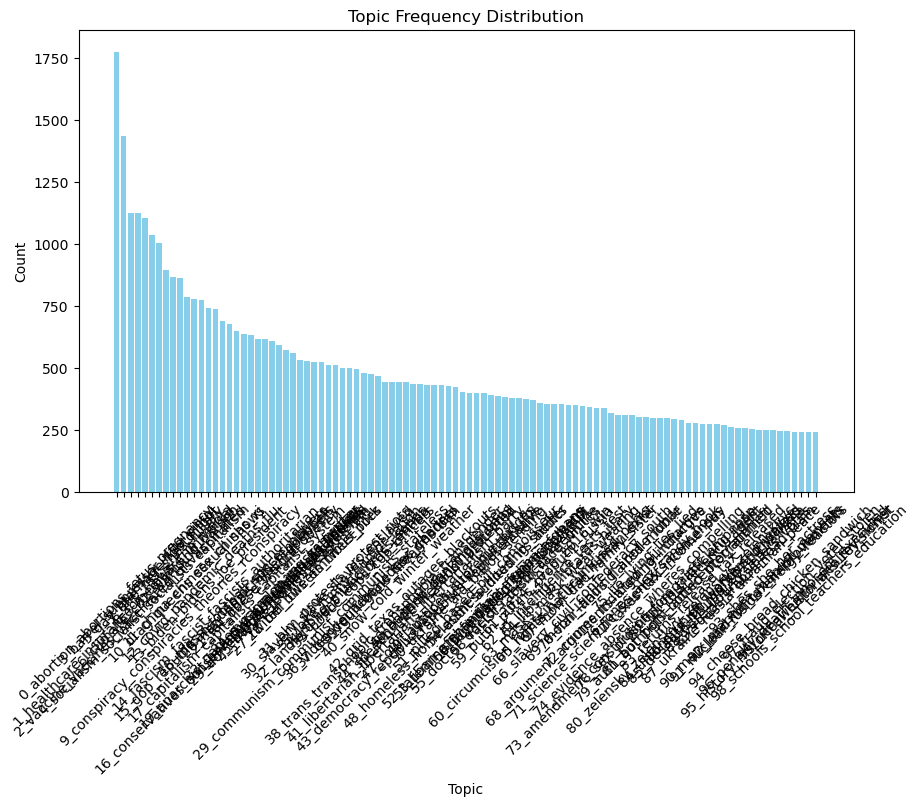

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(topic_info_filtered_first_100['Name'], topic_info_filtered_first_100['Count'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Frequency Distribution')
plt.xticks(rotation=45)
plt.show()

In [2]:
loaded_model = BERTopic.load("models/bert_topic_model")

In [ ]:
embeddings = loaded_model.topic_embeddings_

(2444, 384)

In [9]:
loaded_model.reduce_topics(messages_list, nr_topics=500)

In [10]:
# Access updated topics
topic_info_new = loaded_model.get_topic_info()

In [11]:
topic_info_new.to_csv("topic_modelling/reclustered/topic_info_full_reclustered_500.csv", sep="\t", index=False)

#### Getting the document info 

In [15]:
topic_model = BERTopic.load("models/bert_topic_model")

document_info = topic_model.get_document_info(messages_list)
document_info

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,"im gonna find it just to check, it's not the ...",281,281_art_ai_artists_artist,"[art, ai, artists, artist, pixel, creative, ar...",NaN,art - ai - artists - artist - pixel - creative...,False
1,According to you criticizing and being skeptic...,-1,-1_russia_he_ukraine_and,"[russia, he, ukraine, and, to, they, in, that,...",NaN,russia - he - ukraine - and - to - they - in -...,False
2,Gotcha. Can you explain to me why your opinion...,263,263_opinion_opinions_unpopular_entitled,"[opinion, opinions, unpopular, entitled, diffe...",NaN,opinion - opinions - unpopular - entitled - di...,False
3,"Euros, which some argue is actually harder tha...",108,108_eu_europe_euro_european,"[eu, europe, euro, european, euros, europeans,...",NaN,eu - europe - euro - european - euros - europe...,False
4,You've been sounding more like PunishedSubSist...,722,722_punishment_punish_punished_punishing,"[punishment, punish, punished, punishing, guar...",NaN,punishment - punish - punished - punishing - g...,False
...,...,...,...,...,...,...,...
290893,"Yeah. The way that last sentence comes off, I ...",38,38_trans_transphobic_transphobia_transgender,"[trans, transphobic, transphobia, transgender,...",NaN,trans - transphobic - transphobia - transgende...,False
290894,Sorry. My English sucks ! You must be very go...,1010,1010_english_language_native_typoinfested,"[english, language, native, typoinfested, spea...",NaN,english - language - native - typoinfested - s...,False
290895,Ouch! The Black Panthers precedent.,18,18_messi_football_soccer_players,"[messi, football, soccer, players, baseball, s...",NaN,messi - football - soccer - players - baseball...,False
290896,Ghost should totally be a move,-1,-1_russia_he_ukraine_and,"[russia, he, ukraine, and, to, they, in, that,...",NaN,russia - he - ukraine - and - to - they - in -...,False


In [ ]:
document_info.to_csv("topic_modelling/document_info.csv", sep=",")

KeyboardInterrupt: 